In [127]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [128]:

import gc
def loadSST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,:])
#        except:
#            continue;
    D2=np.array(D2)
    return D2
def loadSST2(fn0,sis,f1=0,f2=512):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[sis,f1:f2])
#        except:
#            continue;
    D2=np.array(D2)
    return D2


In [129]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files),files[0])
for i,f in enumerate(files):
    print(i,f)

71 SST_2022-09-16-11-57-19.h5
0 SST_2022-09-16-11-57-19.h5
1 SST_2022-09-16-12-57-19.h5
2 SST_2022-09-16-13-57-19.h5
3 SST_2022-09-16-14-57-19.h5
4 SST_2022-09-16-15-57-19.h5
5 SST_2022-09-16-16-57-19.h5
6 SST_2022-09-16-17-57-19.h5
7 SST_2022-09-16-18-57-19.h5
8 SST_2022-09-16-19-57-19.h5
9 SST_2022-09-16-20-57-19.h5
10 SST_2022-09-16-21-57-19.h5
11 SST_2022-09-16-22-57-19.h5
12 SST_2022-09-16-23-57-19.h5
13 SST_2022-09-17-09-41-09.h5
14 SST_2022-09-17-10-41-09.h5
15 SST_2022-09-17-11-41-09.h5
16 SST_2022-09-17-12-41-09.h5
17 SST_2022-09-17-13-41-09.h5
18 SST_2022-09-17-14-41-09.h5
19 SST_2022-09-17-15-41-09.h5
20 SST_2022-09-17-16-41-09.h5
21 SST_2022-09-17-17-41-09.h5
22 SST_2022-09-17-18-41-09.h5
23 SST_2022-09-17-18-51-21.h5
24 SST_2022-09-17-18-55-22.h5
25 SST_2022-09-17-19-05-46.h5
26 SST_2022-09-17-20-05-47.h5
27 SST_2022-09-17-21-05-47.h5
28 SST_2022-09-17-21-38-39.h5
29 SST_2022-09-17-21-46-39.h5
30 SST_2022-09-17-21-54-27.h5
31 SST_2022-09-17-22-01-55.h5
32 SST_2022-09-17-22

In [130]:
#sis=[i for i in range(18)] #rcu 8 and 9
sis=[i for i in range(8*3,10*3)] #rcu 8 and 9
#sis=[i for i in range(8*3,10*3)] #rcu 8 and 9
#meas_RCU2L = [0, 1, 24, 25, 30, 31]
#sis = [3*i+j for i in meas_RCU2L for j in range(3)]
#sis=[24,25,26,27,28,29] #inputs set to 110-190 bands
nsi=len(sis)

D=loadSST(fpath+'/'+files[65],sis)
print(D.shape)


(3600, 6, 512)


(-100.0, -80.0)

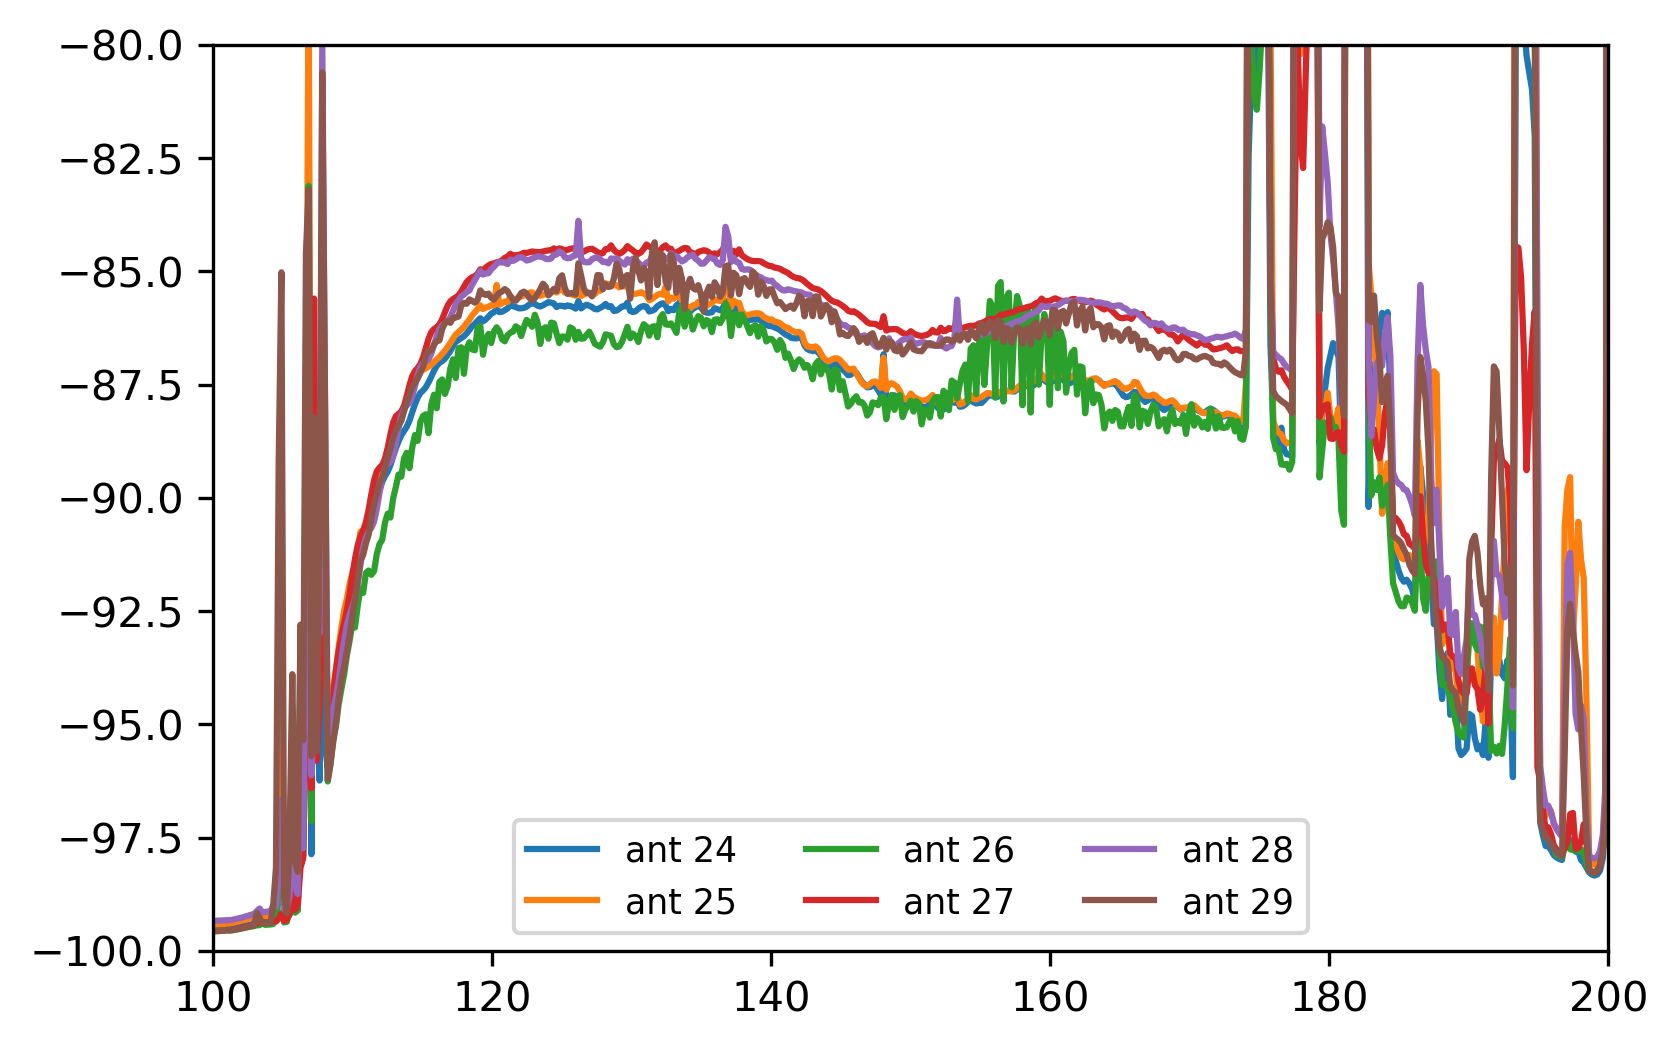

In [134]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=200-np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label="ant "+str(si))
plt.legend(fontsize='small',ncol=3)
plt.xlim(100,200)
plt.ylim(-100,-80)

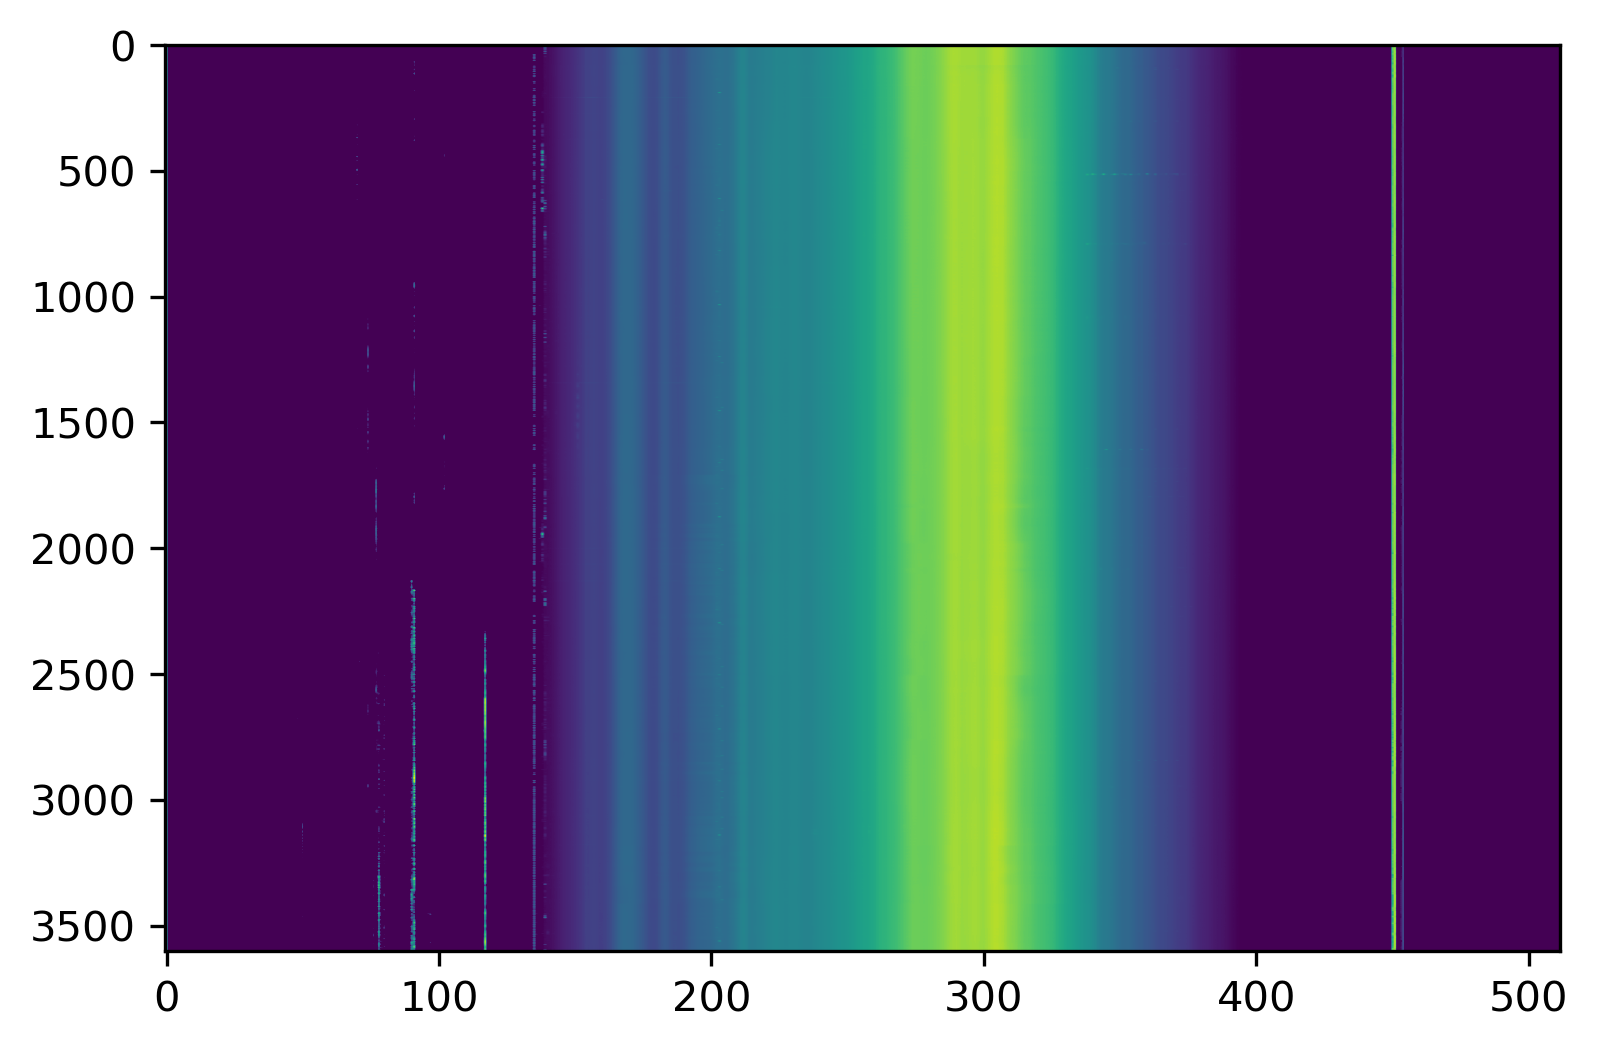

In [114]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

(150.0, 450.0)

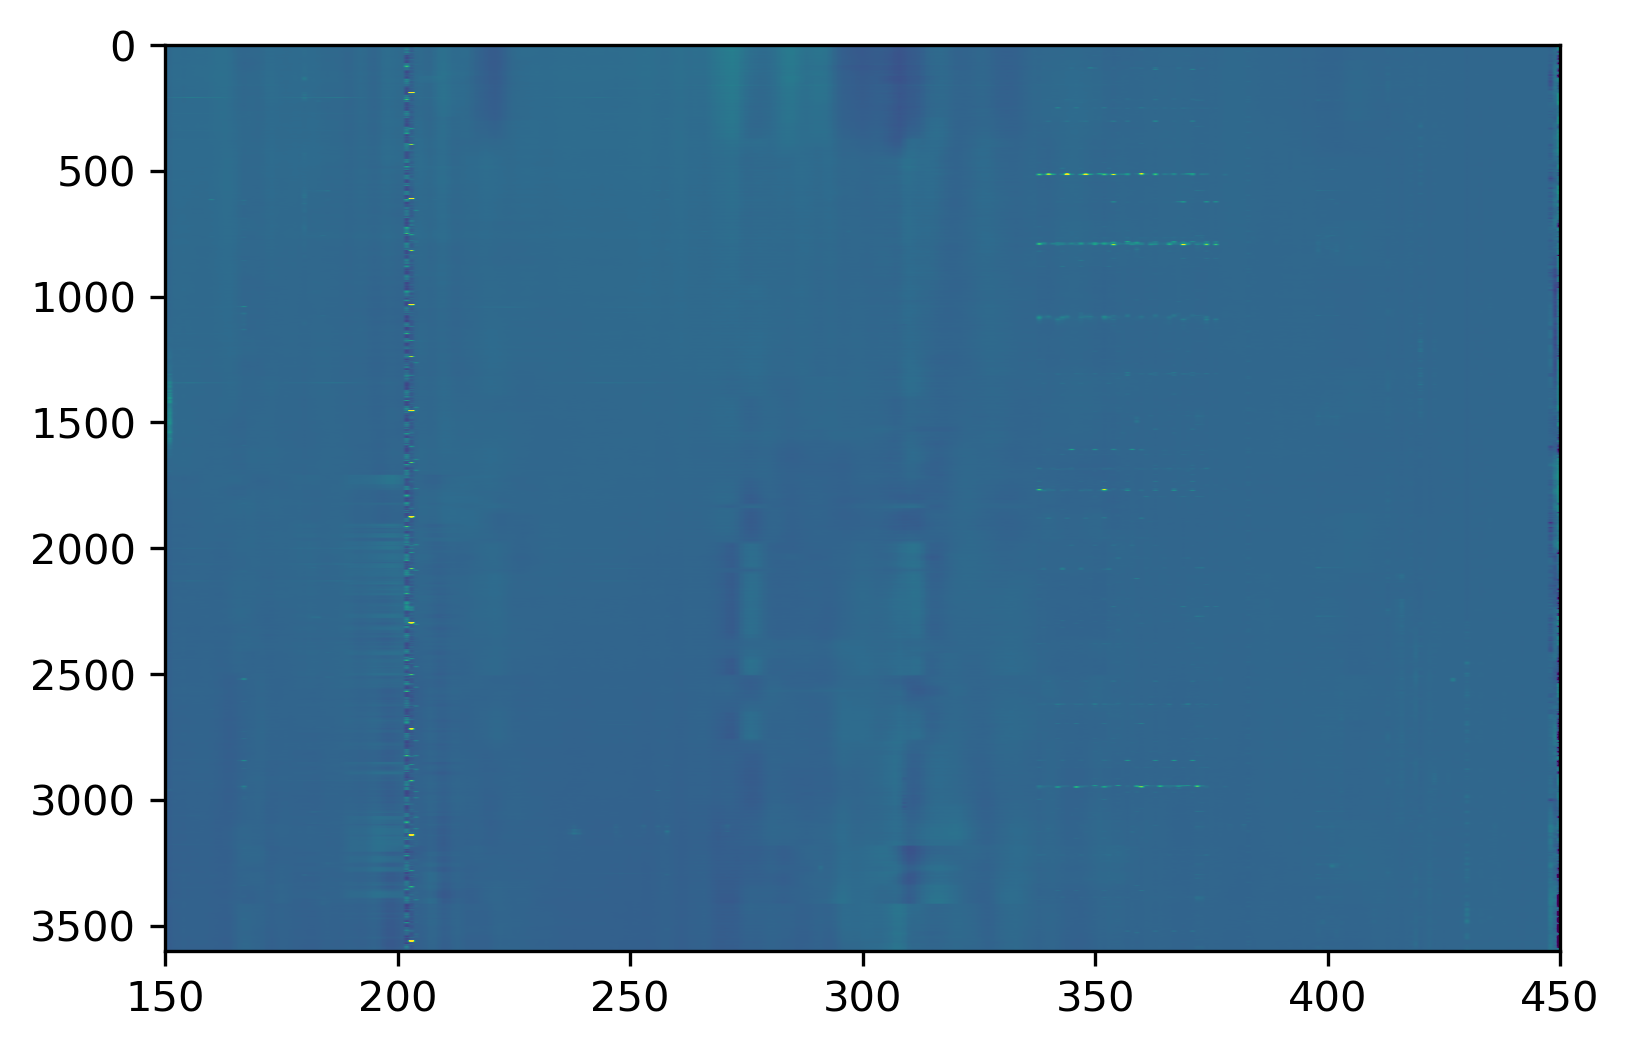

In [115]:
plt.figure(dpi=300)
XX=10*np.log10(D[:,:6,:]).mean(axis=1)
XX-=XX.mean(axis=0)

plt.imshow(XX,aspect='auto',vmin=-1,vmax=2)
plt.xlim(150,450)
#plt.ylim(1500,2000)
#plt.colorbar()

/tmp/ipykernel_218448/3869717358.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10*np.log10(D[:,6,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)


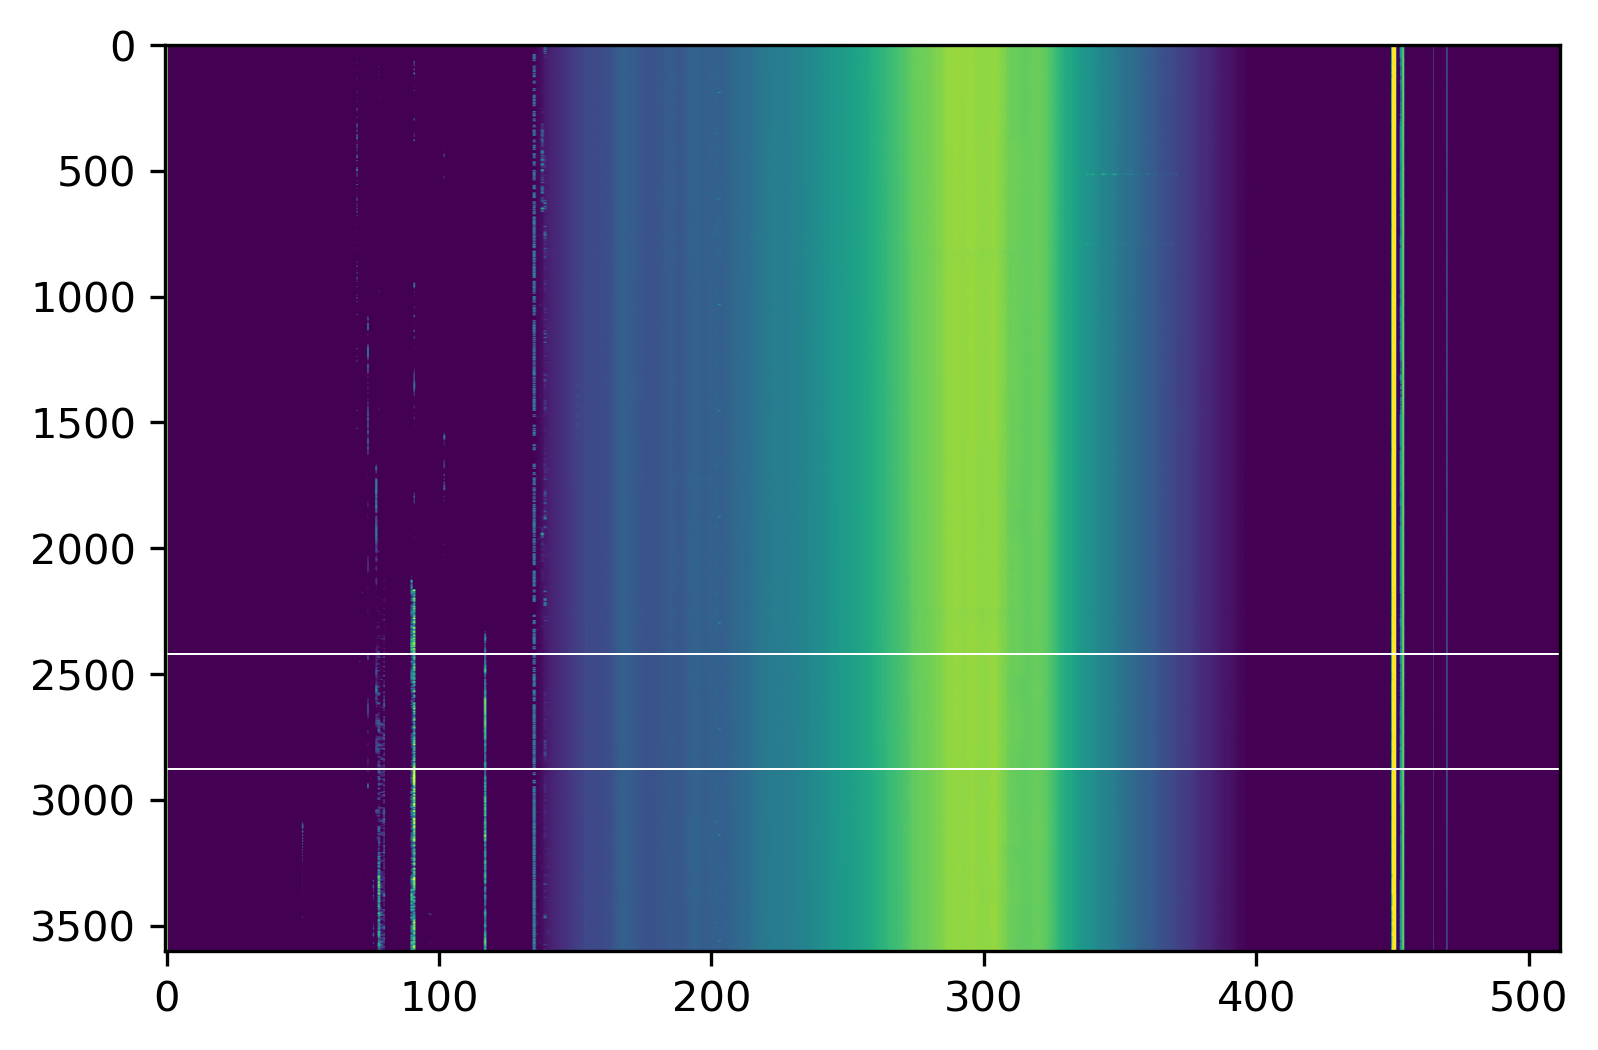

In [123]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,6,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

In [126]:
print(sis[6])

72
